## Clustering Implementation  
### Creating Data Set

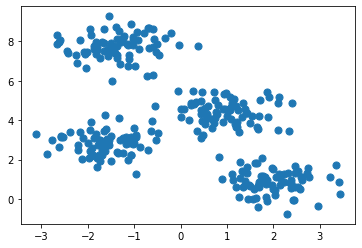

In [25]:
# random data generation library
from sklearn.datasets import make_blobs
# plotting library
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50) # plot pts

### Hieararchical clustering via scikit-learn

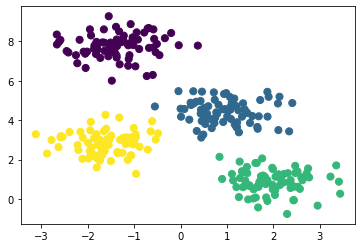

In [26]:
# sklearn clustering libraries
from sklearn.cluster import AgglomerativeClustering

# hieararchical clustering via scikit-learn
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(X)

y_hc = hc.fit_predict(X) # hierarchical.labels_
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')


### Scipy implementation for hierarchical clustering  
Using Dendrogram to show the clustering tree

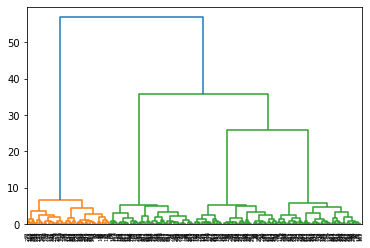

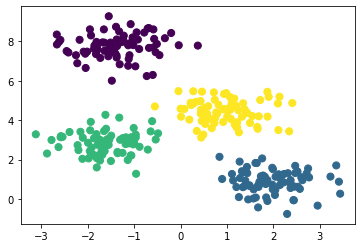

In [27]:
# scipy implementation for hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

link_c = linkage(X, method='ward')
plt.figure()
dendrogram(link_c) # plot dendogram (binary clustering tree)
plt.show()

# plot clusters
max_d = 10 # max_distance btw clusters
lclusters = fcluster(link_c, max_d, criterion='distance')
plt.scatter(X[:, 0], X[:, 1], c=lclusters, s=50, cmap='viridis')

### Kmeans clustering via scikit-learn

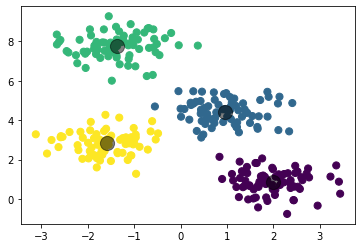

In [31]:
# kmeans clustering via scikit-learn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black',s=200, alpha=0.5);


## KMeans Clustering  
### Creating a dataset where features are from different ranges
Feature 3 is between [50..100]  
Feature 1 is between [1..4]

In [32]:
# numpy
import numpy as np

X = np.array([[1,2,100],[4,3,50],[1,1,75]])
# array([[ 1, 2, 100],
# [ 4, 3, 50],
# [ 1, 1, 75]])



### Calculating Euclidean Distances  
Considering the rows of X (and Y=X) as vectors, compute the distance matrix between each pair of vectors.

In [33]:
# normalizing the data
from sklearn.metrics.pairwise import euclidean_distances

np.around(euclidean_distances(X), 2)
# array([[ 0. , 50.1 , 25.02],
# [50.1 , 0. , 25.26],
# [25.02, 25.26, 0. ]])


array([[ 0.  , 50.1 , 25.02],
       [50.1 ,  0.  , 25.26],
       [25.02, 25.26,  0.  ]])

### Calculating Euclidean Distances of a Normalized set of Features

In [34]:
# for scaling numpy array
from sklearn.preprocessing import StandardScaler

euclidean_distances(StandardScaler().fit_transform(X))
# array([[0. , 3.46, 1.73],
# [3.46, 0. , 3.46],
# [1.73, 3.46, 0. ]])

array([[0.        , 3.46410162, 1.73205081],
       [3.46410162, 0.        , 3.46410162],
       [1.73205081, 3.46410162, 0.        ]])

## KMeans Clustering  
Using universities.csv data file

In [35]:
import pandas as pd
from sklearn.cluster import KMeans

# clustering over pandas dataframe
my_data = pd.read_csv("universities.csv")
my_data.set_index('School', inplace=True) # set column as index
my_data["Type"] = my_data["Type"].astype("category").cat.codes

mat = my_data.values # convert dataframe to matrix
#dist_mat = euclidean_distances(mat)

norm_mat = StandardScaler().fit_transform(mat)
#dist_mat_norm = euclidean_distances(norm_mat)

km = KMeans(n_clusters=4, init='random',n_init=1, verbose=0)
km.fit(norm_mat)
#km.fit(dist_mat_norm)

# Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
results = pd.DataFrame([my_data.index,labels]).T
results

,0,1
0,Amherst,2
1,Barnard,3
2,Bates,3
3,Berkeley,0
4,Bowdoin,2
5,Brown,2
6,ByrnMawr,3
7,CalTech,1
8,UCLA,0
9,UNC,0
